Dataset loaded successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

Enter column names you want to work with, separated by commas:  Pclass, Age



You selected these columns:
   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0
Since these columns contain NUMERIC data, a scatter plot is the best choice for visualization.


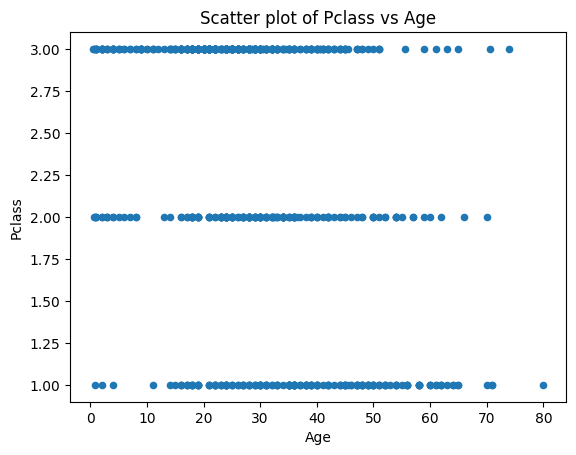

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Titanic-Dataset.csv")
print("Dataset loaded successfully!")
print(df.head())


print("Available Columns in the dataset:")
for column_name in df.columns:
    print(column_name)

selected_cols = input("Enter column names you want to work with, separated by commas: ")

selected_cols = [col.strip() for col in selected_cols.split(',')]

valid_cols = []
for col in selected_cols:
    if col in df.columns:
        valid_cols.append(col)

if not valid_cols:
    print("No valid columns selected!")
else:
    df_selected = df[valid_cols]
    print("")
    print("You selected these columns:")
    print(df_selected.head())


if len(selected_cols) == 1:
    col = selected_cols[0]
    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric → histogram
        df[col].hist(bins=20)
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        print("Since this column contains NUMERIC data, a histogram is the best choice for visualization.")
    else:
        # Categorical → bar chart
        df[col].value_counts().plot(kind="bar")
        plt.title(f"Bar chart of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        print("Since this column contains CATEGORICAL data, a bar chart is the best choice for visualization.")


elif len(selected_cols) == 2:
    col1, col2 = selected_cols

    if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
        # Two numeric → scatter plot
        df.plot.scatter(x=col2, y=col1)
        plt.title(f"Scatter plot of {col1} vs {col2}")
        print("Since these columns contain NUMERIC data, a scatter plot is the best choice for visualization.")

    elif pd.api.types.is_numeric_dtype(df[col1]) and not pd.api.types.is_numeric_dtype(df[col2]):
        # Numeric vs categorical → box plot
        df.boxplot(column=col1, by=col2)
        plt.title(f"Boxplot of {col1} by {col2}")
        plt.suptitle("")
        print("Since this column contains NUMERIC vs CATEGORICAL data, a boxplot is the best choice for visualization.")

    elif not pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
        # Categorical vs numeric → box plot
        df.boxplot(column=col2, by=col1)
        plt.title(f"Boxplot of {col2} by {col1}")
        plt.suptitle("")
        print("Since this column contains CATEGORICAL vs NUMERIC data, a boxplot is the best choice for visualization.")

    else:
        # Two categorical → grouped bar chart
        pd.crosstab(df[col1], df[col2]).plot(kind="bar")
        plt.title(f"Grouped bar chart of {col1} vs {col2}")
        print("Since these columns contain CATEGORICAL data, a grouped bar chart is the best choice for visualization.")


elif len(selected_cols) == 3:
    col1, col2, col3 = selected_cols

    if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]) and pd.api.types.is_numeric_dtype(df[col3]):
        # Three numeric → 3D scatter plot
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df[col1], df[col2], df[col3])
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_zlabel(col3)
        plt.title(f"3D Scatter plot of {col1}, {col2}, and {col3}")
        print("Since all three columns are NUMERIC, a 3D scatter plot is the best choice for visualization.")

    elif pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]) and not pd.api.types.is_numeric_dtype(df[col3]):
        # Numeric vs Numeric vs Categorical
        sns.catplot(x=col3, y=col1, hue=col2, kind="box", data=df)
        plt.title(f"Facet Grid of Box plots of {col1} and {col2} by {col3}")
        print("Since these columns contain 2 NUMERIC and 1 CATEGORICAL data, a facet grid of box plots is the best choice for visualization.")

    elif pd.api.types.is_numeric_dtype(df[col1]) and not pd.api.types.is_numeric_dtype(df[col2]) and not pd.api.types.is_numeric_dtype(df[col3]):
        # Numeric vs Categorical vs Categorical
        sns.catplot(x=col2, hue=col3, kind="count", data=df)
        plt.title(f"Grouped Bar Chart of {col2} and {col3} by {col1}")
        print("Since these columns contain NUMERIC, CATEGORICAL, and CATEGORICAL data, a grouped bar chart is the best choice for visualization.")

    else:
        # Three categorical
        pd.crosstab([df[col1], df[col2]], df[col3]).plot(kind='bar', stacked=True)
        plt.title(f"Stacked Bar Chart of {col1}, {col2}, and {col3}")
        print("Since all three columns are CATEGORICAL, a stacked bar chart is the best choice for visualization.")


else:
    print("More than 3 columns selected. Showing pairplot-style scatter matrix.")
    pd.plotting.scatter_matrix(df[selected_cols], figsize=(8, 8))
    plt.suptitle("Scatter Matrix of Selected Columns")
    plt.show()

plt.show()
